In [30]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pds
#%reset -f  #for clean up things in the memory

# Define Result Path here

In [31]:
data_dir = '/XF11ID/analysis/2017_1/manisen/Results/'

# Build a uid dictionary here

In [32]:
suid_dict = {'Temp=175C_c_1' :'2f781b','Temp=175C_c_2' :'b57f7d', 
             'Temp=175C_c_3' :'9846cb', 'Temp=175C_c_4' :'1cca34', 'Temp=175C_c_5' :'8a6c63', 
             'Temp=175C_c_6' :'b5e2ec', 'Temp=175C_c_7':'cff9b6'}

In [33]:
uid_dict = {}
for u in list( suid_dict.keys() ):
    uid_dict[u] =  get_meta_data( suid_dict[u] )['uid']
print( uid_dict )

{'Temp=175C_c_6': 'b5e2ec3a-c950-49fb-a938-176484288902', 'Temp=175C_c_2': 'b57f7d05-2003-40b0-935d-5fc31d737166', 'Temp=175C_c_4': '1cca3459-917d-4fa3-ada7-8c8f8898ec10', 'Temp=175C_c_3': '9846cbd0-4082-454b-be2a-8378792b66d9', 'Temp=175C_c_1': '2f781ba5-7cd7-4900-bd9f-fc3e1558a4dc', 'Temp=175C_c_5': '8a6c6348-aacb-44d1-b2cf-62c7f859324f', 'Temp=175C_c_7': 'cff9b6d7-3a1a-4275-9174-456216e22aca'}


# Extract result here

In [34]:
total_res = {}

In [35]:
for u in list( uid_dict.keys() ):
    inDir =  data_dir + suid_dict[u] + '/'
    total_res[u] = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%uid_dict[u], import_dir = inDir )
    

In [36]:
print( total_res[list( uid_dict.keys() )[0]].keys()  )

dict_keys(['taus4', 'taus', 'times_roi', 'imgsum', 'roi_mask', 'qval_dict_v', 'g12b', 'tausb', 'mean_int_sets', 'qt', 'g2b_fit_paras', 'g2b', 'g2', 'avg_img', 'qval_dict_p', 'md', 'pixel_mask', 'bad_frame_list', 'q_saxs', 'iqst', 'g2_fit_paras', 'mask', 'g4', 'iq_saxs', 'qval_dict'])


# Do some analysis here

### 1) plot g4

In [23]:
qth_interest = 9 #3      #the intested single qth 

<IPython.core.display.Javascript object>


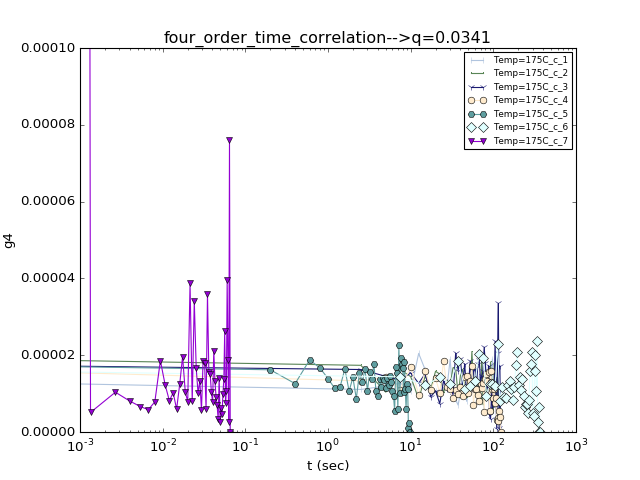

Temp=175C_c_1
Temp=175C_c_2
Temp=175C_c_3
Temp=175C_c_4
Temp=175C_c_5
Temp=175C_c_6
Temp=175C_c_7


In [37]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    print(u)
    plot1D( x =  total_res[u]['taus4'], y= total_res[u]['g4'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0, 0.0001], legend_size = 8, xlabel='t (sec)', ylabel='g4',
           title='four_order_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
    
plt.savefig( data_dir +'g4_101k44pc_175_new_7.png' )    

### 2) Load g2 and re-do fit

In [38]:
fit_g2_func = 'stretched'

for u in sorted(list( uid_dict.keys() )):
    g2 = total_res[u]['g2']
    taus = total_res[u]['taus']    
    g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':False, 'beta':True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta':0.05,'alpha':1.0,'relaxation_rate':0.01,})     
    g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= u  +'_g2_fit_paras.csv', path=data_dir )    
    #print( g2.shape)

The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_1_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_2_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_3_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_4_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_5_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_6_g2_fit_paras.csv
The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/manisen/Results/Temp=175C_c_7_g2_fit_paras.csv


### 3) Plot g2

<IPython.core.display.Javascript object>


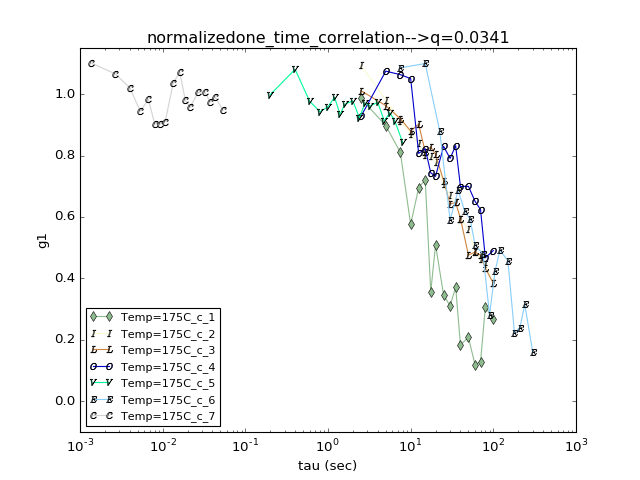

In [40]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    y= total_res[u]['g2'][1:,qth_interest]
    #ym = (y-y.min())/(y.max()-y.min())    
    
    #fits = total_res[u]['g2_fit_paras']  #here load from XPCS_Single Pipeline fit results
    fits = pds.read_csv( data_dir + u + '_g2_fit_paras.csv' )  #load from re-fit results
    
    ym = ( y -  fits['baseline'][qth_interest] )/ fits['beta'][qth_interest]    
    plot1D( x =  total_res[u]['taus'][1:], y= ym,
                   ax=ax, legend= u, ylim=[-0.1, 1.15], legend_size = 10, xlabel='tau (sec)', ylabel='g1',
           title='normalized' +'one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
plt.savefig( data_dir +'normalized'+'g__101k44pc_175_new_7.png' ) 

<IPython.core.display.Javascript object>


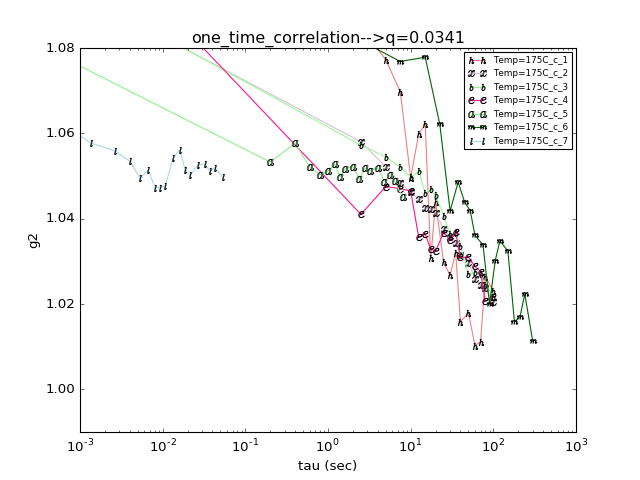

In [41]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    plot1D( x =  total_res[u]['taus'], y= total_res[u]['g2'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0.99, 1.08], legend_size = 8, xlabel='tau (sec)', ylabel='g2',
           title='one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
plt.savefig( data_dir +'g2_101k44pc__175_new_7.png' )  

### 4) Plot q~relaxation time

In [42]:
qs = np.array([total_res[u]['qval_dict'][i][0] for i in range(   len(list(total_res[u]['qval_dict'].keys()))   ) ])

<IPython.core.display.Javascript object>


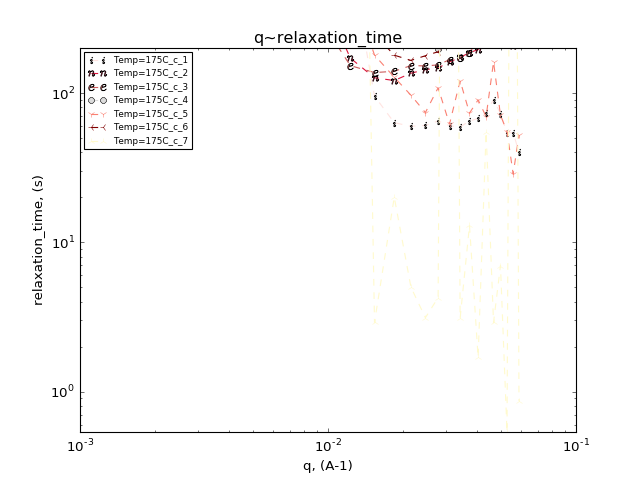

In [43]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    x= qs
    
    #y= 1/total_res[u]['g2_fit_paras']['relaxation_rate']  #here load from XPCS_Single Pipeline fit results
    y =  1/ ( pds.read_csv( data_dir + u + '_g2_fit_paras.csv' )['relaxation_rate'] ) #load from re-fit results
    
    #print(y)
    plot1D( x =  qs, y= y, ax=ax, ylim=[0,200], legend= u, legend_size = 8, ls = '--',
           xlabel='q, (A-1)', ylabel='relaxation_time, (s)',
           title='q~relaxation_time', logx=True, logy=True )
plt.savefig( data_dir +'q~relaxation_time.png' )  